**Libraries**

In [21]:
import pandas as pd
import numpy as np

import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import joypy #el de las densidades guays

from sklearn import manifold  


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import os 
cwd = os.getcwd() + "/"
cwd="/home/angela/Notebook/machine_learning/normalizados/NN_simple_param/"
from sklearn import metrics

from sklearn.neural_network import MLPClassifier


warnings.filterwarnings('ignore') #ATENCION QUE ESTO CREO QUE FUNCIONA PARA TODO EL NOTEBOOK

import random
random.seed(1)
np.random.seed(1)
np.random.RandomState(1)

from sklearn.preprocessing import MinMaxScaler




**LOAD**

In [22]:
#ALL THE DATASET

df=pd.read_pickle("/home/angela/Notebook/data/normalizados/trainpickle")
df_originaltest=pd.read_pickle("/home/angela/Notebook/data/normalizados/testpickle")

In [23]:
#SIMPLe DATASET
#df=pd.read_pickle("/home/angela/Notebook/data/normalizados/trainsimplepickle")
#df_originaltest=pd.read_pickle("/home/angela/Notebook/data/normalizados/testsimplepickle")


# Machine learning

**We will follow the scikit-learn schema to train and validate the model**


https://scikit-learn.org/stable/modules/cross_validation.html


## SVM

In [24]:
#Scores


def Scores(y_true,y_pred):
    
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    prec=tp / (tp + fp)
    recall= tp / (tp + fn)
    F1_score= 2 * (prec * recall) / (prec + recall)
    acc=metrics.accuracy_score(y_true,y_pred)
    kappa_cohen=metrics.cohen_kappa_score(y_true,y_pred)
        
    return(tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen)


def model(X_train,y_train,X_test):
    
    scaler = MinMaxScaler()
    scaler=scaler.fit(X_train)
    
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    model = MLPClassifier() 
    
    #grid search, copy of kaggle: https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv#L72
    #defalult (scikit learn) :  best_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)))

    #params = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}    #model = SVC(probability=True) 
    #reduced: 
    #params = {'solver': ['lbfgs','adam', 'sgd'], 'max_iter': [200,600,1000,1400,1800], 'alpha': 10.0 ** -np.arange(4, 6), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0]}    #model = SVC(probability=True) 
 
    params = {'solver': ['lbfgs'], 'max_iter': [1500,2000], 'alpha': [10.0 ** -5], 'hidden_layer_sizes':[15,25,35], 'random_state':[0],
             'learning_rate':['constant'],'activation':[ 'tanh']}
             #he pprobado y el solver sale siepre mejor lgbs
            #he pprobado y el learning_rate sale siepre mejor constant
            #he pprobado y el learning_rate sale siepre mejor tanh


        
        #'learning_rate':['constant', 'invscaling', 'adaptive'],'activation':['identity', 'logistic', 'tanh', 'relu']}    


    grid = GridSearchCV(estimator=model, param_grid=params,cv=5,verbose=1, n_jobs=-1)

    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    
    best_model.fit(X_train,y_train)
    # Predict test set labels
    y_pred = best_model.predict(X_test)    
    y_pred_proba = best_model.predict_proba(X_test)[::,1] #Neccesary to make the ROC curve 

    return(grid,best_model,y_pred,y_pred_proba)

mass= 500
train mass   0.0    500.0
label              
0      50168      0
1          0  49832
test mass     0      500
label              
0      24949      0
1          0  25051
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 48.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 48.2min finished


MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=35, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


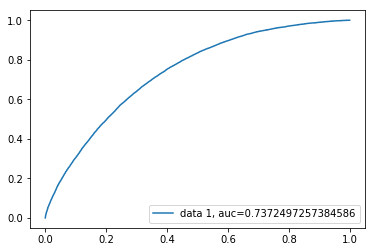

mass= 750
train mass   0.0    750.0
label              
0      49776      0
1          0  50224
test mass     0      750
label              
0      24826      0
1          0  25174
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 49.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 49.1min finished


MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=35, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


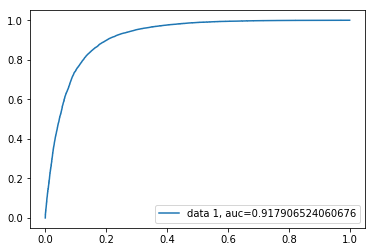

mass= 1000
train mass   0.0     1000.0
label                
0       50061       0
1           0   49939
test mass    0      1000
label              
0      25131      0
1          0  24869
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 47.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 47.3min finished


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [25]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])



for i in (500,750,1000,1250,1500):
#for i in (1250,1500):

    print('mass=', i )

    #train
      #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    #dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000=df.loc[df['mass'] ==i]        
    dfmass0=df.loc[df['mass'] == 0].sample(random_state=1,n=dfmass1000.shape[0])   #cojo todos!!!!!!!!!!!!!! 
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=20000*5)
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))
    dfmass1000=dfmass1000.drop('mass', axis=1)        #la masa es una caracterísitca
    
    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test=dfmass1000test.sample(random_state=1,n=10000*5)

    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  
    
    dfmass1000test=dfmass1000test.drop('mass', axis=1)  
    
    

    X_train=dfmass1000.drop(['label'], axis=1)
    X_train=X_train.drop(['lep_phi','met_phi','jets_no','jet1_phi','jet1_btag','jet2_phi','jet2_btag','jet3_phi','jet3_btag','jet4_phi', 'jet4_btag'], axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    X_test=X_test.drop(['lep_phi','met_phi','jets_no','jet1_phi','jet1_btag','jet2_phi','jet2_btag','jet3_phi','jet3_btag','jet4_phi', 'jet4_btag'], axis=1)
    y_test=dfmass1000test.label
        
   # print(X_train)
   # print(y_test)

    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)

#Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    #plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 

    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc


print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)


display(df_metrics)

In [26]:
df_metrics

,tn,fp,fn,tp,acc,prec,recall,F1_score,kappa_cohen,auc
500,15580,9369,6850,18201,0.67562,0.660174,0.726558,0.691777,0.351104,0.73725
750,20210,4616,2880,22294,0.85008,0.828465,0.885596,0.856079,0.7,0.917907
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_metrics.to_pickle('g_reduc')

In [ ]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

In [ ]:
fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.savefig(cwd+ 'metrics_comparation.png')

# Entrenando con todas las masas

In [ ]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])


for i in (500,750,1000,1250,1500):

    print('mass=', i )

    #train
      #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    #dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass0=df.loc[df['mass'] == 0]
    dfmass1000=df.loc[df['mass'] !=0].sample(random_state=1,n=dfmass0.shape[0])      
    
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=20000*5)
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))
    dfmass1000=dfmass1000.drop('mass', axis=1)        #la masa es una caracterísitca
    
    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test=dfmass1000test.sample(random_state=1,n=10000*5)

    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  
    
    dfmass1000test=dfmass1000test.drop('mass', axis=1)  
    

    X_train=dfmass1000.drop(['label'], axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    y_test=dfmass1000test.label
        
    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)


#Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    #plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 
    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc


print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)

display(df_metrics)

In [ ]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

In [ ]:
fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.savefig(cwd+ 'metrics_comparation.png')

## Una masa y datos reducidos

In [ ]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])



for i in (500,750,1000,1250,1500):

    print('mass=', i )

    #train
    dfmass0=df.loc[df['mass'] == 0]     #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000=df.loc[df['mass'] !=0].sample(random_state=1,n=dfmass0.shape[0])                                                      #cojo todos!!!!!!!!!!!!!! 
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=20000*5)         #la masa es una caracterísitca
    dfmass1000=dfmass1000[dfmass1000.mass==i]
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))  

    dfmass1000=dfmass1000.drop('mass', axis=1)  

    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test=dfmass1000test.sample(random_state=1,n=10000*5)

    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  
    
    dfmass1000test=dfmass1000test.drop('mass', axis=1)  
    
    

    

    X_train=dfmass1000.drop(['label'], axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    y_test=dfmass1000test.label
        
   # print(X_train)
   # print(y_test)

    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)

#Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    #plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 

    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc


print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)


display(df_metrics)

In [ ]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

In [ ]:
fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.savefig(cwd+ 'metrics_comparation.png')

# REDUCIDO PARA COMPARAR CON SVM

In [ ]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])



for i in (500,750,1000,1250,1500):

    print('mass=', i )

    #train
      #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    #dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000=df.loc[df['mass'] ==i]        
    dfmass0=df.loc[df['mass'] == 0].sample(random_state=1,n=dfmass1000.shape[0])   #cojo todos!!!!!!!!!!!!!! 
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=2000*5)
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))
    dfmass1000=dfmass1000.drop('mass', axis=1)        #la masa es una caracterísitca
    
    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test=dfmass1000test.sample(random_state=1,n=1000*5)

    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  
    
    dfmass1000test=dfmass1000test.drop('mass', axis=1)  
    
    

    X_train=dfmass1000.drop(['label'], axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    y_test=dfmass1000test.label
        
   # print(X_train)
   # print(y_test)

    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)

#Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    #plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 

    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc


print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)


display(df_metrics)

In [ ]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

In [ ]:


fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.savefig(cwd+ 'metrics_comparation.png')

# REDUCIDO PARA COMPARAR CON SVM

# Comparativa modelos clásicos 

In [ ]:
rn1=[0.681753,0.852713,0.915944,0.942561,0.960839]
lr=[0.617727,0.838647,0.905506,0.936106,0.955204]
RF=[,,,,,]

rn2=[0.650547,0.843397,0.902616,0.933979,0.956949]
SVM=[,,,,,]

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(["500","750","1000","1250","1500"], ldfmean[0].F1_score, label="Neural network")
ax.plot(["500","750","1000","1250","1500"], ldfmean[1].F1_score, label="1 jet b")
ax.plot(["500","750","1000","1250","1500"], ldfmean[2].F1_score, label="2 jets b")
ax.plot(["500","750","1000","1250","1500"], ldfmean[3].F1_score, label="Proporción jets b: 86%-13%-1%")
ax.plot(["500","750","1000","1250","1500"], ldfmean[4].F1_score, label="Proporción jets b: 65%-33%-2%")


ax.set_xlabel('Masa de test', fontsize=11)
ax.set_ylabel('F1-score', fontsize=11)
ax.legend(fontsize='large',loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Comparación de F1-score para las diferentes configuraciones de b-tag' , fontsize=14)
plt.show()